In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv('game_user_churn.csv')

Data preprocessing and cleaning


In [35]:

df

,userID,age,gender,country,total_play_time,avg_session_time,games_played,in_game_purchases,last_login,friend_count,churn,game_genre,max_level_achieved,daily_play_time,subscription_status,device_type,number_of_sessions,social_interactions,achievement_points,favorite_game_mode
0,0,56,Other,UK,90,82,1,258,19,133,0,Adventure,28,6,Yes,PC,17,211,9768,Coop
1,1,46,Male,Germany,475,107,8,421,24,75,1,Action,25,297,Yes,Console,34,95,2790,Single-player
2,2,32,Male,Brazil,888,42,10,255,2,111,0,Adventure,39,253,No,PC,25,127,6697,Single-player
3,3,25,Female,Germany,725,31,20,167,4,10,1,Strategy,3,241,Yes,PC,6,367,836,Single-player
4,4,38,Female,Canada,187,94,18,470,14,193,0,Simulation,11,181,No,Console,41,425,7261,Multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,26,Other,South Korea,254,44,25,335,0,50,0,RPG,26,32,No,PC,15,186,220,Multiplayer
9996,9996,58,Male,Japan,4,27,10,478,15,153,0,Simulation,5,38,Yes,Console,39,165,1196,Multiplayer
9997,9997,35,Female,India,580,119,11,470,25,34,1,Adventure,47,105,Yes,Mobile,19,51,5733,Multiplayer
9998,9998,46,Female,Germany,51,79,12,349,10,125,0,Simulation,7,66,No,Console,16,449,2205,Multiplayer


In [36]:
df.head(5)

,userID,age,gender,country,total_play_time,avg_session_time,games_played,in_game_purchases,last_login,friend_count,churn,game_genre,max_level_achieved,daily_play_time,subscription_status,device_type,number_of_sessions,social_interactions,achievement_points,favorite_game_mode
0,0,56,Other,UK,90,82,1,258,19,133,0,Adventure,28,6,Yes,PC,17,211,9768,Coop
1,1,46,Male,Germany,475,107,8,421,24,75,1,Action,25,297,Yes,Console,34,95,2790,Single-player
2,2,32,Male,Brazil,888,42,10,255,2,111,0,Adventure,39,253,No,PC,25,127,6697,Single-player
3,3,25,Female,Germany,725,31,20,167,4,10,1,Strategy,3,241,Yes,PC,6,367,836,Single-player
4,4,38,Female,Canada,187,94,18,470,14,193,0,Simulation,11,181,No,Console,41,425,7261,Multiplayer


In [37]:
df.shape

(10000, 20)

In [38]:
df.isnull().sum()


userID                 0
age                    0
gender                 0
country                0
total_play_time        0
avg_session_time       0
games_played           0
in_game_purchases      0
last_login             0
friend_count           0
churn                  0
game_genre             0
max_level_achieved     0
daily_play_time        0
subscription_status    0
device_type            0
number_of_sessions     0
social_interactions    0
achievement_points     0
favorite_game_mode     0
dtype: int64

In [39]:
df.nunique()

userID                 10000
age                       42
gender                     3
country                   10
total_play_time         1000
avg_session_time         110
games_played              29
in_game_purchases        500
last_login                30
friend_count             200
churn                      2
game_genre                 5
max_level_achieved        49
daily_play_time          300
subscription_status        2
device_type                3
number_of_sessions        50
social_interactions      500
achievement_points      6339
favorite_game_mode         3
dtype: int64

In [40]:
df.describe()

,userID,age,total_play_time,avg_session_time,games_played,in_game_purchases,last_login,friend_count,churn,max_level_achieved,daily_play_time,number_of_sessions,social_interactions,achievement_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,38.546400,499.476300,64.288200,14.978100,246.076300,14.478000,99.178100,0.312900,25.067100,149.663800,24.423700,247.835800,5011.201700
std,2886.89568,12.014287,288.493319,31.522943,8.375132,143.556355,8.657587,57.438711,0.463697,14.152633,86.478037,14.434466,143.952491,2898.145526
min,0.00000,18.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,28.000000,248.000000,37.000000,8.000000,120.000000,7.000000,50.000000,0.000000,13.000000,75.000000,12.000000,122.000000,2515.000000
50%,4999.50000,39.000000,501.000000,65.000000,15.000000,245.000000,14.000000,99.000000,0.000000,25.000000,150.000000,24.000000,249.000000,5008.500000
75%,7499.25000,49.000000,748.000000,92.000000,22.000000,371.000000,22.000000,149.000000,1.000000,37.000000,224.000000,37.000000,372.000000,7534.250000
max,9999.00000,59.000000,999.000000,119.000000,29.000000,499.000000,29.000000,199.000000,1.000000,49.000000,299.000000,49.000000,499.000000,9999.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   userID               10000 non-null  int64 
 1   age                  10000 non-null  int64 
 2   gender               10000 non-null  object
 3   country              10000 non-null  object
 4   total_play_time      10000 non-null  int64 
 5   avg_session_time     10000 non-null  int64 
 6   games_played         10000 non-null  int64 
 7   in_game_purchases    10000 non-null  int64 
 8   last_login           10000 non-null  int64 
 9   friend_count         10000 non-null  int64 
 10  churn                10000 non-null  int64 
 11  game_genre           10000 non-null  object
 12  max_level_achieved   10000 non-null  int64 
 13  daily_play_time      10000 non-null  int64 
 14  subscription_status  10000 non-null  object
 15  device_type          10000 non-null  object
 16  numbe

In [42]:
# Print unique categories for categorical features
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].unique())

print("Categories in 'country' variable:", end=" ")
print(df['country'].unique())

print("Categories in 'game_genre' variable:", end=" ")
print(df['game_genre'].unique())

print("Categories in 'subscription_status' variable:", end=" ")
print(df['subscription_status'].unique())

print("Categories in 'device_type' variable:", end=" ")
print(df['device_type'].unique())

print("Categories in 'favorite_game_mode' variable:", end=" ")
print(df['favorite_game_mode'].unique())

Categories in 'gender' variable: ['Other' 'Male' 'Female']
Categories in 'country' variable: ['UK' 'Germany' 'Brazil' 'Canada' 'Japan' 'South Korea' 'France' 'USA'
 'India' 'Australia']
Categories in 'game_genre' variable: ['Adventure' 'Action' 'Strategy' 'Simulation' 'RPG']
Categories in 'subscription_status' variable: ['Yes' 'No']
Categories in 'device_type' variable: ['PC' 'Console' 'Mobile']
Categories in 'favorite_game_mode' variable: ['Coop' 'Single-player' 'Multiplayer']


In [43]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# Print counts and unique values for each feature type
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

# Print unique values count for categorical features
print("\nUnique value counts for categorical features:")
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

# Print unique values count for numerical features
print("\nUnique value counts for numerical features:")
for feature in numeric_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

# Print summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df[numeric_features].describe())

# Print value counts for each categorical feature
print("\nValue counts for each categorical feature:")
for feature in categorical_features:
    print(f"\nCounts in '{feature}' variable:\n{df[feature].value_counts()}")


We have 14 numerical features: ['userID', 'age', 'total_play_time', 'avg_session_time', 'games_played', 'in_game_purchases', 'last_login', 'friend_count', 'churn', 'max_level_achieved', 'daily_play_time', 'number_of_sessions', 'social_interactions', 'achievement_points']

We have 6 categorical features: ['gender', 'country', 'game_genre', 'subscription_status', 'device_type', 'favorite_game_mode']

Unique value counts for categorical features:
gender: 3 unique values
country: 10 unique values
game_genre: 5 unique values
subscription_status: 2 unique values
device_type: 3 unique values
favorite_game_mode: 3 unique values

Unique value counts for numerical features:
userID: 10000 unique values
age: 42 unique values
total_play_time: 1000 unique values
avg_session_time: 110 unique values
games_played: 29 unique values
in_game_purchases: 500 unique values
last_login: 30 unique values
friend_count: 200 unique values
churn: 2 unique values
max_level_achieved: 49 unique values
daily_play_time:

 EDA for catgorical features
 

In [44]:
import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

target_instance = df["churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

Churn: No – 68.7%
Churn: Yes – 31.3%

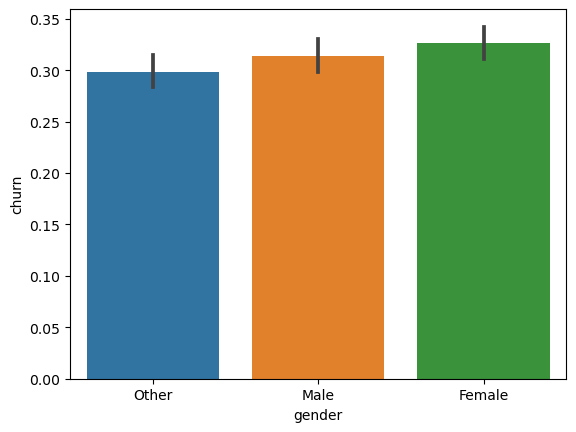

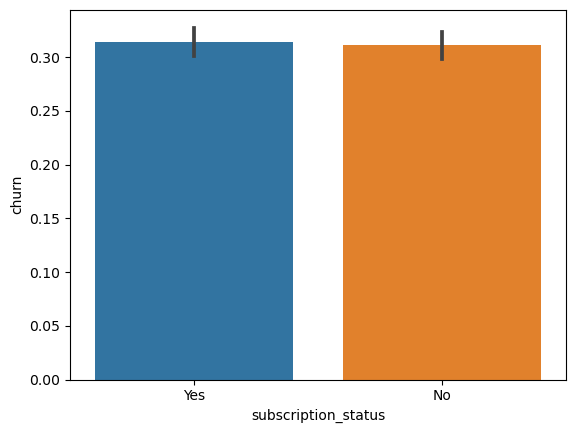

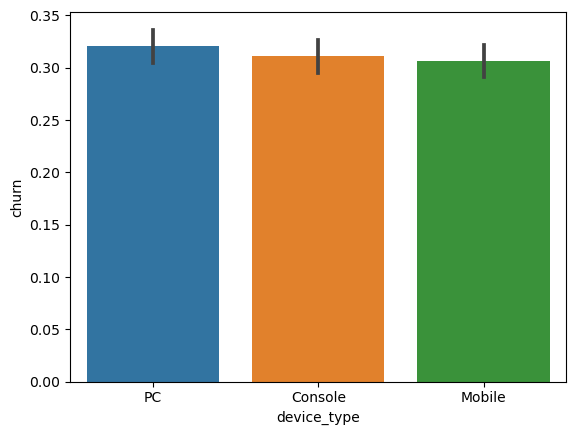

In [45]:

import seaborn as sns
import matplotlib.pyplot as plt

# Gender vs Churn
sns.barplot(x='gender', y='churn', data=df)
plt.show()

# Subscription Status vs Churn
sns.barplot(x='subscription_status', y='churn', data=df)
plt.show()

# Device Type vs Churn
sns.barplot(x='device_type', y='churn', data=df)
plt.show()



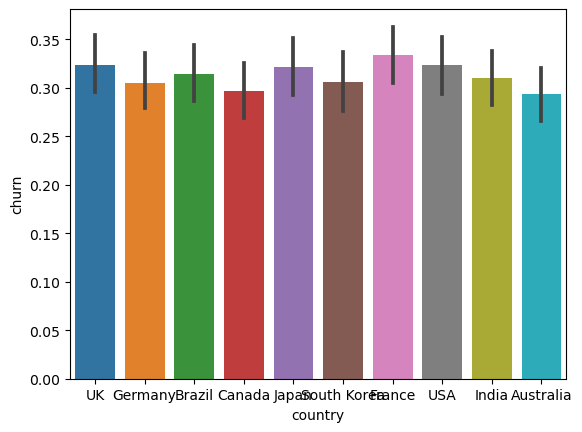

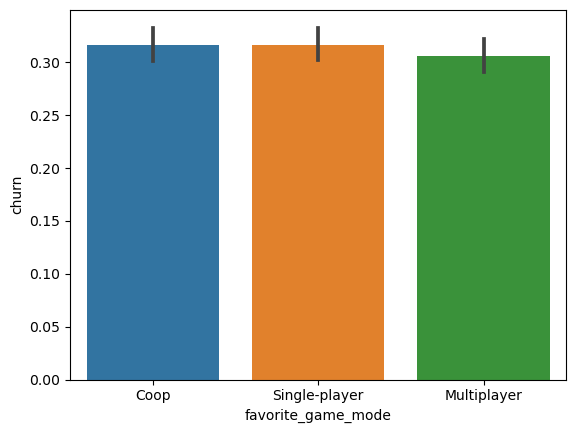

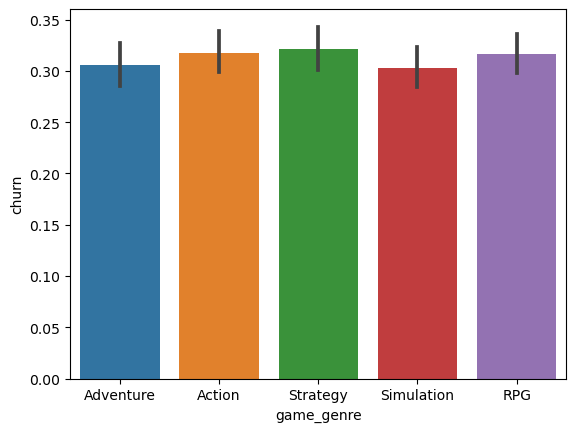

In [46]:
# Device Type vs Churn
sns.barplot(x='country', y='churn', data=df)
plt.show()

sns.barplot(x='favorite_game_mode', y='churn', data=df)
plt.show()

sns.barplot(x='game_genre', y='churn', data=df)
plt.show()

EDA for numerical features

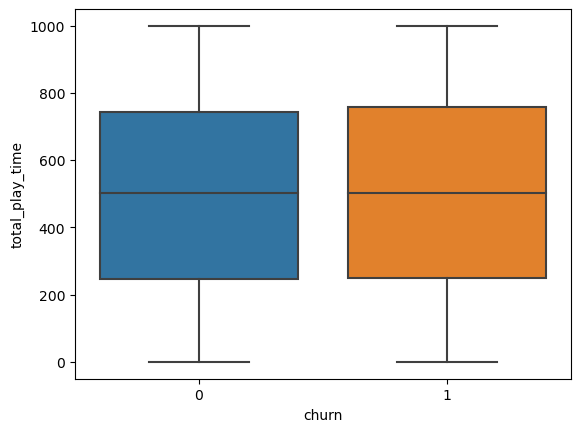

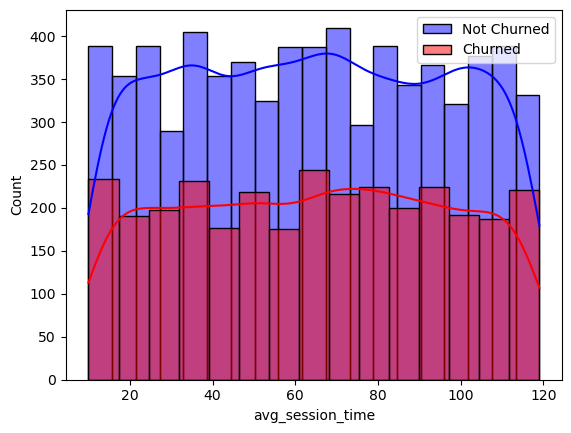

In [47]:
# Boxplot for total_play_time vs Churn
sns.boxplot(x='churn', y='total_play_time', data=df)
plt.show()

# Histogram for avg_session_time vs Churn
sns.histplot(df[df['churn'] == 0]['avg_session_time'], color='blue', label='Not Churned', kde=True)
sns.histplot(df[df['churn'] == 1]['avg_session_time'], color='red', label='Churned', kde=True)
plt.legend()
plt.show()


C:\Users\Rakshitha\AppData\Local\Temp\ipykernel_11092\2981627560.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



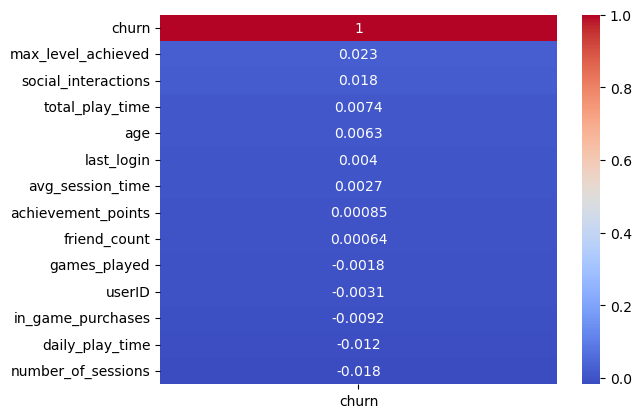

In [48]:
# Correlation with Churn
corr = df.corr()
sns.heatmap(corr[['churn']].sort_values(by='churn', ascending=False), annot=True, cmap='coolwarm')
plt.show()


In [49]:
df.head(3)

,userID,age,gender,country,total_play_time,avg_session_time,games_played,in_game_purchases,last_login,friend_count,churn,game_genre,max_level_achieved,daily_play_time,subscription_status,device_type,number_of_sessions,social_interactions,achievement_points,favorite_game_mode
0,0,56,Other,UK,90,82,1,258,19,133,0,Adventure,28,6,Yes,PC,17,211,9768,Coop
1,1,46,Male,Germany,475,107,8,421,24,75,1,Action,25,297,Yes,Console,34,95,2790,Single-player
2,2,32,Male,Brazil,888,42,10,255,2,111,0,Adventure,39,253,No,PC,25,127,6697,Single-player


In [50]:
df['subscription_status'] = df['subscription_status'].map({'Yes': 1, 'No': 0})


In [51]:
df

,userID,age,gender,country,total_play_time,avg_session_time,games_played,in_game_purchases,last_login,friend_count,churn,game_genre,max_level_achieved,daily_play_time,subscription_status,device_type,number_of_sessions,social_interactions,achievement_points,favorite_game_mode
0,0,56,Other,UK,90,82,1,258,19,133,0,Adventure,28,6,1,PC,17,211,9768,Coop
1,1,46,Male,Germany,475,107,8,421,24,75,1,Action,25,297,1,Console,34,95,2790,Single-player
2,2,32,Male,Brazil,888,42,10,255,2,111,0,Adventure,39,253,0,PC,25,127,6697,Single-player
3,3,25,Female,Germany,725,31,20,167,4,10,1,Strategy,3,241,1,PC,6,367,836,Single-player
4,4,38,Female,Canada,187,94,18,470,14,193,0,Simulation,11,181,0,Console,41,425,7261,Multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,26,Other,South Korea,254,44,25,335,0,50,0,RPG,26,32,0,PC,15,186,220,Multiplayer
9996,9996,58,Male,Japan,4,27,10,478,15,153,0,Simulation,5,38,1,Console,39,165,1196,Multiplayer
9997,9997,35,Female,India,580,119,11,470,25,34,1,Adventure,47,105,1,Mobile,19,51,5733,Multiplayer
9998,9998,46,Female,Germany,51,79,12,349,10,125,0,Simulation,7,66,0,Console,16,449,2205,Multiplayer


In [52]:
df.shape

(10000, 20)

In [53]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})


In [54]:
df = pd.get_dummies(df, columns=['game_genre'], drop_first=True)


In [55]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)


In [56]:
df = pd.get_dummies(df, columns=['device_type'], drop_first=True)


In [57]:

df = pd.get_dummies(df, columns=['favorite_game_mode'], drop_first=True)


In [58]:
# Check for missing values in the dataframe
df.isnull().sum()


userID                              0
age                                 0
gender                              0
total_play_time                     0
avg_session_time                    0
games_played                        0
in_game_purchases                   0
last_login                          0
friend_count                        0
churn                               0
max_level_achieved                  0
daily_play_time                     0
subscription_status                 0
number_of_sessions                  0
social_interactions                 0
achievement_points                  0
game_genre_Adventure                0
game_genre_RPG                      0
game_genre_Simulation               0
game_genre_Strategy                 0
country_Brazil                      0
country_Canada                      0
country_France                      0
country_Germany                     0
country_India                       0
country_Japan                       0
country_Sout

In [59]:
# Checking the correlation between features
corr = df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df.columns]

#Effect the change to the dataframe column names
df.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['userID', 'churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'churn ~ {glm_columns}', data=df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9968
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6197.2
Date:                Tue, 03 Sep 2024   Deviance:                       12394.
Time:                        10:40:25   Pearson chi2:                 1.00e+04
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003354
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [61]:
np.exp(res.params)

Intercept                           0.403275
age                                 1.001362
gender                              0.937422
total_play_time                     1.000058
avg_session_time                    1.000195
games_played                        0.999588
in_game_purchases                   0.999866
last_login                          1.000940
friend_count                        1.000041
max_level_achieved                  1.003537
daily_play_time                     0.999714
subscription_status                 1.012306
number_of_sessions                  0.997340
social_interactions                 1.000265
achievement_points                  1.000000
game_genre_Adventure                0.950290
game_genre_RPG                      0.994810
game_genre_Simulation               0.937385
game_genre_Strategy                 1.019973
country_Brazil                      1.100924
country_Canada                      1.008168
country_France                      1.211601
country_Ge

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# List of numerical features to scale
numerical_features = [
    'total_play_time', 'avg_session_time', 'games_played', 
    'in_game_purchases', 'last_login', 'friend_count', 
    'max_level_achieved', 'daily_play_time', 'number_of_sessions', 
    'social_interactions', 'achievement_points'
]

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the changes
print(df.head())


   userID  age  gender  total_play_time  avg_session_time  games_played  \
0       0   56       2         0.090090          0.660550      0.000000   
1       1   46       1         0.475475          0.889908      0.250000   
2       2   32       1         0.888889          0.293578      0.321429   
3       3   25       0         0.725726          0.192661      0.678571   
4       4   38       0         0.187187          0.770642      0.607143   

   in_game_purchases  last_login  friend_count  churn  ...  country_Germany  \
0           0.517034    0.655172      0.668342      0  ...                0   
1           0.843687    0.827586      0.376884      1  ...                1   
2           0.511022    0.068966      0.557789      0  ...                0   
3           0.334669    0.137931      0.050251      1  ...                1   
4           0.941884    0.482759      0.969849      0  ...                0   

   country_India  country_Japan  country_South_Korea  country_UK  country_

In [63]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model


log_model = modeling(LogisticRegression, 'Logistic Regression', params={
    'max_iter': 500,   # Increase the maximum number of iterations
    'solver': 'liblinear',  # Use an alternative solver
    'class_weight': 'balanced'  # Try balancing class weights to handle imbalanced data
})


Logistic Regression
accuracy:  0.5036666666666667
precision:  0.3041637261820748
recall:  0.4614561027837259
f1_score:  0.5218025527038613


In [64]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Function to model and evaluate
def modeling(alg, alg_name, params={}):
    model = alg(**params)  # Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance evaluation
    def print_scores(alg_name, y_true, y_pred):
        print(f"\n{alg_name}")
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ", acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ", pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ", rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ", f_score)

    print_scores(alg_name, y_test, y_pred)
    return model

# Running Support Vector Machine (SVM)
svm_model = modeling(SVC, 'Support Vector Machine', params={'kernel': 'linear', 'C': 1.0})




Support Vector Machine
accuracy:  0.6726666666666666
precision:  0.25
recall:  0.02569593147751606
f1_score:  0.5671048478573708


In [65]:

# Running Random Forest Classifier
rf_model = modeling(RandomForestClassifier, 'Random Forest', params={'n_estimators': 100, 'random_state': 50})

# Running Decision Tree Classifier
dt_model = modeling(DecisionTreeClassifier, 'Decision Tree', params={'random_state': 50})








Random Forest
accuracy:  0.684
precision:  0.0625
recall:  0.0010706638115631692
f1_score:  0.5600436894215738

Decision Tree
accuracy:  0.5556666666666666
precision:  0.30149253731343284
recall:  0.32441113490364026
f1_score:  0.5599174779896251


In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X = df.drop('churn', axis=1)
y = df['churn']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=50)


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Random Forest Model with Grid Search for Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=50), rf_params, cv=5, scoring='f1')
rf_model.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters found: ", rf_model.best_params_)
y_pred_rf = rf_model.predict(X_test)
print_scores('Random Forest', y_test, y_pred_rf)

# Support Vector Machine Model with Grid Search for Hyperparameter Tuning
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced']
}

svm_model = GridSearchCV(SVC(random_state=50), svm_params, cv=5, scoring='f1')
svm_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(model_name, y_true, y_pred):
    print(f"{model_name} Model Performance:")
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("F1 Score: ", f1_score(y_true, y_pred))
    print("\n")
    
# Best parameters and performance
print("Best parameters found: ", svm_model.best_params_)
y_pred_svm = svm_model.predict(X_test)
print_scores('SVM', y_test, y_pred_svm)


Best parameters found:  {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Model Performance:
Accuracy:  0.7426631093863691
Precision:  0.8576487252124646
Recall:  0.5847416706904877
F1 Score:  0.6953775480907264


